In [40]:
import tensorflow 
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models,datasets 
from tensorflow.keras.datasets.mnist import load_data

In [41]:
(x_train,y_train),(x_test,y_test) = load_data()


In [42]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))#0 th index is the  pixels
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

In [43]:
x_train.shape

(60000, 28, 28, 1)

In [44]:
x_test.shape

(10000, 28, 28, 1)

In [45]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

In [46]:
img_shape = x_train.shape[1:]
img_shape

(28, 28, 1)

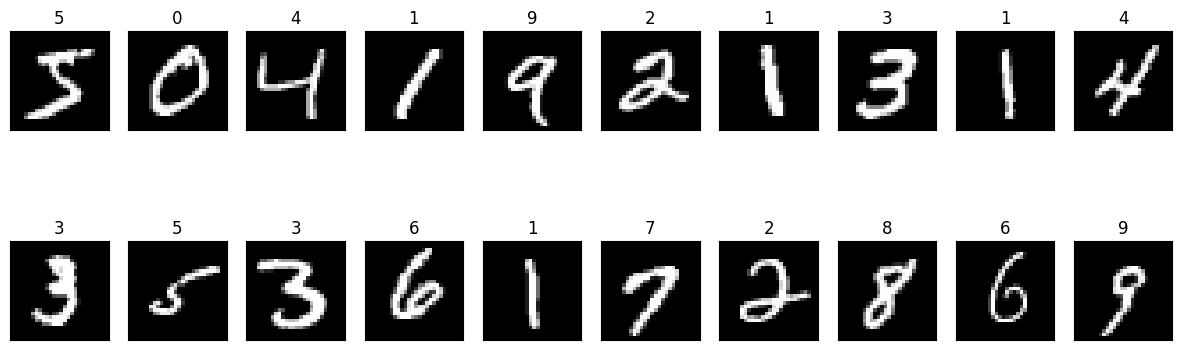

In [47]:
fig = plt.figure(figsize = (15,5))
for i in range(20):
    ax = fig.add_subplot(2,10,i+1,xticks = [],yticks = [])
    ax.imshow(np.squeeze(x_train[i]),cmap="gray")
    ax.set_title(y_train[i])
    

In [49]:
# cnn model
cnn = models.Sequential([
    layers.Conv2D(filters = 32 ,kernel_size =(3,3),padding ="same" ,activation = "relu",input_shape = img_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64 ,kernel_size =(3,3),padding ="same",activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(64,activation = "relu"),
    layers.Dense(10,activation = "sigmoid")
])


In [50]:
cnn.compile(optimizer='adam',loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

In [56]:
cnn.fit(x_train,y_train,batch_size=100,epochs=5)

Epoch 1/5
600/600 [==============================] - 58s 96ms/step - loss: 0.0242 - accuracy: 0.9920
Epoch 2/5
600/600 [==============================] - 62s 103ms/step - loss: 0.0206 - accuracy: 0.9934
Epoch 3/5
600/600 [==============================] - 69s 115ms/step - loss: 0.0165 - accuracy: 0.9947
Epoch 4/5
600/600 [==============================] - 65s 108ms/step - loss: 0.0153 - accuracy: 0.9948
Epoch 5/5
600/600 [==============================] - 62s 104ms/step - loss: 0.0122 - accuracy: 0.9961


In [57]:
y_pred = cnn.predict(x_test)
y_pred

313/313 [==============================] - 3s 10ms/step


array([[1.2282539e-01, 7.0683345e-02, 5.2284437e-01, ..., 1.0000000e+00,
        5.6468626e-04, 9.6249038e-01],
       [9.9514145e-01, 9.3909460e-01, 1.0000000e+00, ..., 9.0291409e-04,
        8.3142102e-02, 8.3601614e-03],
       [2.9228730e-02, 9.9999779e-01, 4.3822634e-01, ..., 9.9260253e-01,
        5.1787418e-01, 2.7573485e-02],
       ...,
       [1.1996930e-03, 2.4407274e-01, 2.3313097e-04, ..., 9.9809593e-01,
        8.7552547e-01, 9.4628567e-01],
       [9.8805392e-01, 2.0479320e-09, 4.2918826e-05, ..., 1.6116109e-02,
        9.9926585e-01, 1.4231174e-01],
       [9.2997938e-02, 5.2135519e-04, 2.7912049e-02, ..., 1.7534401e-05,
        3.0543379e-02, 8.5984275e-04]], dtype=float32)

In [59]:
loss,accuracy = cnn.evaluate(x_test,y_test)


313/313 [==============================] - 3s 8ms/step - loss: 0.0432 - accuracy: 0.9868


Text(0.5, 1.0, '4')

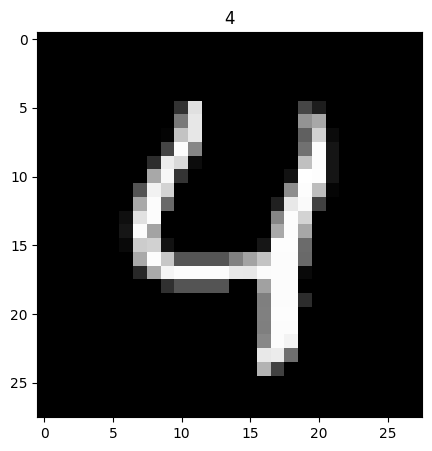

In [73]:
img = x_test[4]
plt.figure(figsize=(20,5))
plt.imshow(np.squeeze(img),cmap = "gray")

plt.title(y_test[4])

In [74]:
image = img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
pred = cnn.predict(image)

1/1 [==============================] - 0s 24ms/step


In [75]:
print(f"The prediction result is {np.argmax(pred)}")

The prediction result is 4


In [83]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [80]:
pred

array([[8.3134472e-01, 8.1049956e-02, 4.1851364e-03, 3.3437316e-03,
        1.0000000e+00, 1.1027798e-03, 9.4029953e-04, 1.4731570e-01,
        3.4565321e-01, 9.9810880e-01]], dtype=float32)

In [82]:
y_classes = [np.argmax(i)for i in y_pred]
y_classes[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [97]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

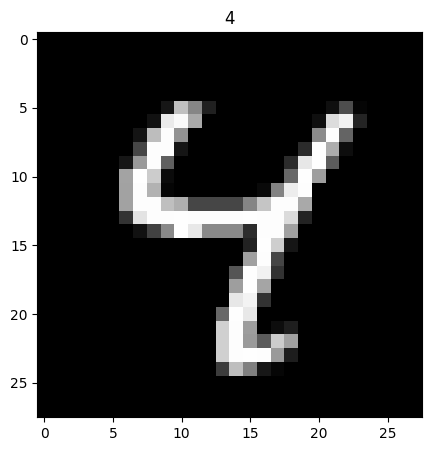

In [113]:
def plot_sample(x,y,index):
    plt.figure(figsize=(20,5))
    plt.imshow(np.squeeze(x[index]),cmap="gray")
    plt.title(y[index])
plot_sample(x_test,y_test,6)

In [116]:
y_classes[6]

4

In [104]:
prediction = cnn.predict(x_train)

1875/1875 [==============================] - 14s 7ms/step


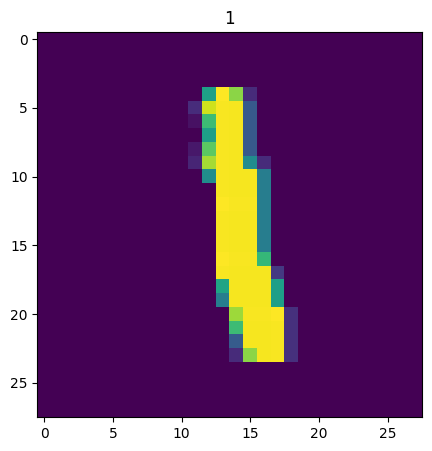

In [114]:
def plot_sample(x,y,index):
    plt.figure(figsize=(20,5))
    plt.imshow(x[index])
    plt.title(y[index])
plot_sample(x_train,y_train,6)

In [107]:
prediction = [np.argmax(i) for i in prediction]

In [115]:
prediction[6]

1